# Лабораторная работа № 2. Логистическая регрессия

На основе набора данных об измерениях роста и веса решите следующую задачу.

Файл с данными - [Davis.csv](https://github.com/sdukshis/ml-intro/blob/master/datasets/Davis.csv)

Расширьте набор признаков добавив данные об измеренном и сообщенном весе, а также данные об поле человека.

Обратите внимание, что в некоторых строках встречаются пропуски. Это обычная ситуация при работе с реальными данными. Эти пропуски необходиму убрать из таблицы вместе со всей строкой. Это можно сделать с помощью метода [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

## Задание

1. Обучите модель логистической регресси на данных, используя в качестве целевой переменной пол (sex), а в качестве признаков рост и вес (height, weight).
2. Нарисуйте точки выборки и разделяющую поверхость.
2. Оцените точность и полноту полученного решения и постройте график ROC кривой
3. Расширьте простарнство признаков квадратичными признаками.
2. Нарисуйте точки выборки и разделяющую поверхость.
2. Оцените точность и полноту полученного решения и постройте график ROC кривой

In [7]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
ds = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)
ds


,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
...,...,...,...,...,...
196,M,74,175,71.0,175.0
197,M,83,180,80.0,180.0
198,M,81,175,NaN,NaN
199,M,90,181,91.0,178.0


In [9]:
ds=ds.dropna() # убрать пропуски
ds

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
...,...,...,...,...,...
195,F,62,164,61.0,161.0
196,M,74,175,71.0,175.0
197,M,83,180,80.0,180.0
199,M,90,181,91.0,178.0


In [20]:
from sklearn.preprocessing import LabelEncoder    

labelencoder = LabelEncoder()
ds['sex'] = labelencoder.fit_transform(ds['sex']) #Преобразование текстовых данных в числовые

print(ds)

     sex  weight  height  repwt  repht
1      1      77     182   77.0  180.0
2      0      58     161   51.0  159.0
3      0      53     161   54.0  158.0
4      1      68     177   70.0  175.0
5      0      59     157   59.0  155.0
..   ...     ...     ...    ...    ...
195    0      62     164   61.0  161.0
196    1      74     175   71.0  175.0
197    1      83     180   80.0  180.0
199    1      90     181   91.0  178.0
200    1      79     177   81.0  178.0

[181 rows x 5 columns]


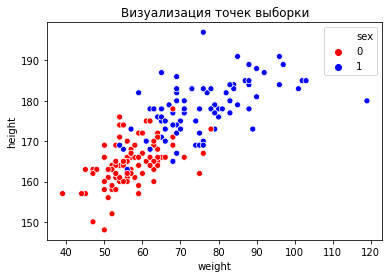

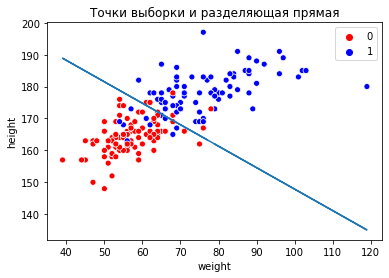

Точность: 0.8235294117647058
Полнота: 0.8235294117647058


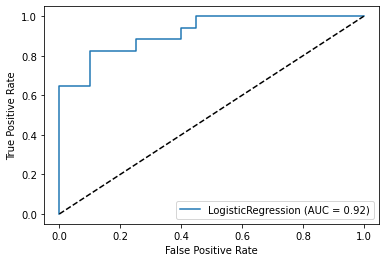

In [61]:
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.model_selection import train_test_split 

import seaborn as sns # для красивого стиля графиков
import matplotlib.pyplot as plt 
sns.scatterplot(ds['weight'],ds['height'], hue=ds['sex'], palette=['red', 'blue']);
plt.title("Визуализация точек выборки")
plt.show()

X = np.array(ds[['weight','height']])
Y = np.array(ds['sex'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #разбиение на наборы

# обучение
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0).fit(x_train, y_train)

#построение логической регрессии
w1 = model.coef_[0][0]
w2 = model.coef_[0][1]
b = model.intercept_[0]

# Вывод графика
sns.scatterplot(X[:, 0],X[:, 1], hue=Y, palette=['red', 'blue']);
plt.plot(X[:, 0], -w1/w2*X[:, 0]-b/w2)
plt.ylabel('height')
plt.xlabel('weight')
plt.title("Точки выборки и разделяющая прямая")
plt.show()

#точность и полнота модели
y_pred = model.predict(x_test)
from sklearn.metrics import precision_score, recall_score 
print('Точность:', precision_score(y_test, y_pred))
print('Полнота:', recall_score(y_test, y_pred))

#ROC кривая
from sklearn.metrics import plot_roc_curve

disp1 = plot_roc_curve(model, x_test, y_test)
disp1.ax_.plot([0, 1], [0, 1], 'k--');

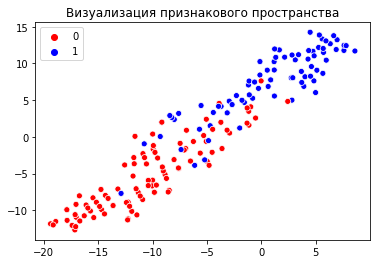

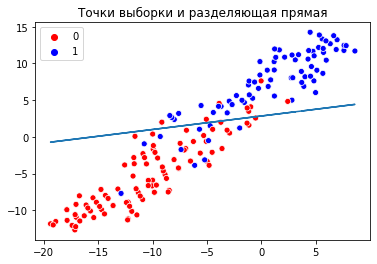

Точность: 1.0
Полнота: 0.9047619047619048


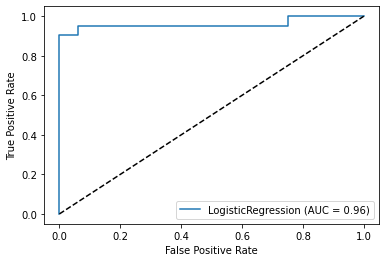

In [63]:
from sklearn.manifold import TSNE
ds['sq_weight']=ds['weight']*ds['weight']
ds['sq_height']=ds['height']*ds['height']
# Расширенный набор данных
X = np.array(ds[['weight','height','sq_weight','sq_height']])
Y = np.array(ds['sex'])

#Понижение размерности
tsne = TSNE(random_state=17) 
tsne_X = tsne.fit_transform(X)
sns.scatterplot(tsne_X[:, 0],tsne_X[:, 1], hue=Y, palette=['red', 'blue']);
plt.title("Визуализация признакового пространства")
plt.show()

x_train, x_test, y_train, y_test = train_test_split(tsne_X, Y, test_size=0.2) #разбиение на наборы
tsne = TSNE(random_state=17) 
# обучение
model = LogisticRegression(random_state=0).fit(x_train, y_train)

#построение логической регрессии
w1 = model.coef_[0][0]
w2 = model.coef_[0][1]
b = model.intercept_[0]

# Вывод графика
sns.scatterplot(tsne_X[:, 0],tsne_X[:, 1], hue=Y, palette=['red', 'blue']);
plt.plot(tsne_X[:, 0], -w1/w2*tsne_X[:, 0]-b/w2)
plt.title("Точки выборки и разделяющая прямая")
plt.show()

#точность и полнота модели
y_pred = model.predict(x_test)
print('Точность:', precision_score(y_test, y_pred))
print('Полнота:', recall_score(y_test, y_pred))

#ROC кривая
disp2 = plot_roc_curve(model, x_test, y_test)
disp2.ax_.plot([0, 1], [0, 1], 'k--');